In [53]:
import pandas as pd
import requests

# URL del archivo JSON en GitHub (versión raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer los datos desde la API
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame de Pandas
df = pd.DataFrame(data_json)

# Mostrar información inicial
print(df.head())
print(df.info())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [54]:
# Ver lista de columnas
print(df.columns.tolist())

# Resumen de tipos de datos y valores nulos
print(df.info())

# Estadísticas generales (solo numéricas)
print(df.describe())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count

In [55]:
# Conteo de valores nulos por columna
print(df.isnull().sum())

# Porcentaje de valores nulos
print((df.isnull().sum() / len(df)) * 100)

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [56]:
# Número de filas duplicadas based on customerID
print("Duplicados:", df.duplicated(subset=['customerID']).sum())

# If there are duplicates based on customerID, you can drop them:
df = df.drop_duplicates(subset=['customerID'])

Duplicados: 0


In [57]:
# Verificar tipos de datos
print(df.dtypes)

# Attempt to extract 'TotalCharges' from the 'account' column
df['TotalCharges'] = df['account'].apply(lambda x: x.get('TotalCharges'))

# Attempt to extract 'FechaIngreso' from the 'customer' column
df['FechaIngreso'] = df['customer'].apply(lambda x: x.get('FechaIngreso'))

# Convert TotalCharges to numeric (forzando errores a NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Convert FechaIngreso to datetime (forzando errores a NaT) and normalize
df["FechaIngreso"] = pd.to_datetime(df["FechaIngreso"], errors="coerce")
df["FechaIngreso"] = df["FechaIngreso"].dt.normalize()

# Display the updated DataFrame info to check the new columns and dtypes
print(df.info())

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customerID    7267 non-null   object        
 1   Churn         7267 non-null   object        
 2   customer      7267 non-null   object        
 3   phone         7267 non-null   object        
 4   internet      7267 non-null   object        
 5   account       7267 non-null   object        
 6   TotalCharges  0 non-null      float64       
 7   FechaIngreso  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 454.3+ KB
None


In [58]:
# Attempt to extract 'TotalCharges' from the 'account' column
df['TotalCharges'] = df['account'].apply(lambda x: x.get('TotalCharges'))

# Attempt to extract 'FechaIngreso' from the 'customer' column
df['FechaIngreso'] = df['customer'].apply(lambda x: x.get('FechaIngreso'))

# Convert TotalCharges to numeric (forzando errores a NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Convert FechaIngreso to datetime (forzando errores a NaT) and normalize
df["FechaIngreso"] = pd.to_datetime(df["FechaIngreso"], errors="coerce")
df["FechaIngreso"] = df["FechaIngreso"].dt.normalize()

# Display the updated DataFrame info to check the new columns and dtypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customerID    7267 non-null   object        
 1   Churn         7267 non-null   object        
 2   customer      7267 non-null   object        
 3   phone         7267 non-null   object        
 4   internet      7267 non-null   object        
 5   account       7267 non-null   object        
 6   TotalCharges  0 non-null      float64       
 7   FechaIngreso  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 454.3+ KB
None


In [59]:
# Revisar categorías únicas por cada columna que contiene diccionarios
dict_columns = ['customer', 'phone', 'internet', 'account']

for col in dict_columns:
    print(f"\nColumn: {col}")
    # Collect all values from the dictionaries for each key
    all_values = {}
    for row in df[col]:
        if isinstance(row, dict):
            for key, value in row.items():
                if key not in all_values:
                    all_values[key] = []
                # Convert dictionary values to string for unique check
                if isinstance(value, dict):
                    all_values[key].append(str(value))
                else:
                    all_values[key].append(value)

    # Print unique values for each key
    for key, values in all_values.items():
        print(f"  Key: {key}")
        print(f"  Unique values: {pd.Series(values).unique()}")
        print(f"  Value counts:\n{pd.Series(values).value_counts()}")

# Also check unique values for other object columns
for col in df.select_dtypes(include="object"):
    if col not in dict_columns and col != 'customerID': # Exclude customerID as it's unique
        print(f"\nColumn: {col}")
        print(f"Unique values: {df[col].unique()}")
        print(f"Value counts:\n{df[col].value_counts()}")


Column: customer
  Key: gender
  Unique values: ['Female' 'Male']
  Value counts:
Male      3675
Female    3592
Name: count, dtype: int64
  Key: SeniorCitizen
  Unique values: [0 1]
  Value counts:
0    6085
1    1182
Name: count, dtype: int64
  Key: Partner
  Unique values: ['Yes' 'No']
  Value counts:
No     3749
Yes    3518
Name: count, dtype: int64
  Key: Dependents
  Unique values: ['Yes' 'No']
  Value counts:
No     5086
Yes    2181
Name: count, dtype: int64
  Key: tenure
  Unique values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
  Value counts:
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

Column: phone
  Key: PhoneService
  Unique values: ['Yes' 'No']
  Value counts:
Yes    6560
No      707
Name: 

In [60]:
# --- 2. Aplanar los diccionarios ---
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar todo en un solo DataFrame limpio
df_clean = pd.concat([df[['customerID','Churn']],
                      df_customer, df_phone, df_internet, df_account], axis=1)

# --- 3. Conversión de tipos ---
df_clean["Charges.Total"] = pd.to_numeric(df_clean["Charges.Total"], errors="coerce")
df_clean["tenure"] = pd.to_numeric(df_clean["tenure"], errors="coerce")
df_clean["Charges.Monthly"] = pd.to_numeric(df_clean["Charges.Monthly"], errors="coerce")


# --- 4. Corrección de valores faltantes ---
# TotalCharges en clientes con tenure=0 → poner 0
df_clean.loc[df_clean["tenure"] == 0, "Charges.Total"] = 0

# --- 5. Normalización de categorías ---
# Unificar valores en MultipleLines
df_clean["MultipleLines"] = df_clean["MultipleLines"].replace("No phone service", "No")

# Convertir Yes/No a 1/0 (ejemplo: Partner, Dependents, etc.)
yes_no_cols = ["Partner","Dependents","PhoneService","PaperlessBilling","OnlineSecurity",
               "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines"]

for col in yes_no_cols:
    df_clean[col] = df_clean[col].map({"Yes":1, "No":0})

# --- 6. Revisar dataset final ---
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    5686 non-null   float64
 11  OnlineBackup      5686 non-null   float64
 12  DeviceProtection  5686 non-null   float64
 13  TechSupport       5686 non-null   float64
 14  StreamingTV       5686 non-null   float64
 15  StreamingMovies   5686 non-null   float64
 16  Contract          7267 non-null   object 


In [61]:
# Crear columna Cuentas_Diarias a partir de Charges.Monthly
df_clean["Cuentas_Diarias"] = df_clean["Charges.Monthly"] / 30

# Verificar nueva columna
print(df_clean[["Charges.Monthly", "Cuentas_Diarias"]].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [62]:
df_clean = df_clean.rename(columns={
    "tenure": "Meses_Cliente",
    "Charges.Monthly": "Cuentas_Mensuales", # Corrected original column name
    "Charges.Total": "Cuentas_Totales",   # Corrected original column name
    "Cuentas_Diarias": "Cuentas_Diarias",
    "Churn": "Evasion"
})

In [63]:
df_clean["Evasion"] = df_clean["Evasion"].map({"Yes": 1, "No": 0})


In [64]:
df_clean["Contract"] = df_clean["Contract"].replace({
    "Month-to-month": "Mensual",
    "One year": "1 Año",
    "Two year": "2 Años"
})

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean[["Cuentas_Mensuales", "Cuentas_Diarias", "Cuentas_Totales"]] = scaler.fit_transform(
    df_clean[["Cuentas_Mensuales", "Cuentas_Diarias", "Cuentas_Totales"]]
)

In [66]:
# Resumen de estadísticas para variables numéricas
print(df_clean.describe())

# Resumen de todas las variables (numéricas y categóricas)
print(df_clean.describe(include="all"))

           Evasion  SeniorCitizen      Partner   Dependents  Meses_Cliente  \
count  7043.000000    7267.000000  7267.000000  7267.000000    7267.000000   
mean      0.265370       0.162653     0.484106     0.300124      32.346498   
std       0.441561       0.369074     0.499782     0.458343      24.571773   
min       0.000000       0.000000     0.000000     0.000000       0.000000   
25%       0.000000       0.000000     0.000000     0.000000       9.000000   
50%       0.000000       0.000000     0.000000     0.000000      29.000000   
75%       1.000000       0.000000     1.000000     1.000000      55.000000   
max       1.000000       1.000000     1.000000     1.000000      72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7267.000000    7267.000000     5686.000000   5686.000000   
mean       0.902711       0.421770        0.365459      0.440380   
std        0.296371       0.493876        0.481601      0.496476   
min        0.000000      

In [67]:
# Media, mediana y desviación estándar de las principales métricas
print("Media de meses como cliente:", df_clean["Meses_Cliente"].mean())
print("Mediana de meses como cliente:", df_clean["Meses_Cliente"].median())
print("Desviación estándar:", df_clean["Meses_Cliente"].std())

print("Media de cuentas mensuales:", df_clean["Cuentas_Mensuales"].mean())
print("Mediana de cuentas mensuales:", df_clean["Cuentas_Mensuales"].median())
print("Desviación estándar:", df_clean["Cuentas_Mensuales"].std())

print("Media de cuentas totales:", df_clean["Cuentas_Totales"].mean())
print("Mediana de cuentas totales:", df_clean["Cuentas_Totales"].median())
print("Desviación estándar:", df_clean["Cuentas_Totales"].std())

Media de meses como cliente: 32.34649786707032
Mediana de meses como cliente: 29.0
Desviación estándar: 24.571772888767292
Media de cuentas mensuales: 0.4623890318601022
Mediana de cuentas mensuales: 0.517910447761194
Desviación estándar: 0.29979673518076705
Media de cuentas totales: 0.26220316359936235
Mediana de cuentas totales: 0.15995762711864409
Desviación estándar: 0.2612205907591264


In [68]:
# Distribución de la evasión (target)
print(df_clean["Evasion"].value_counts(normalize=True) * 100)

# Distribución por tipo de contrato
print(df_clean["Contract"].value_counts(normalize=True) * 100)

# Distribución por servicio de internet
print(df_clean["InternetService"].value_counts(normalize=True) * 100)

Evasion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64
Contract
Mensual    55.112151
2 Años     23.985138
1 Año      20.902711
Name: proportion, dtype: float64
InternetService
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64


/tmp/ipython-input-3656733124.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")


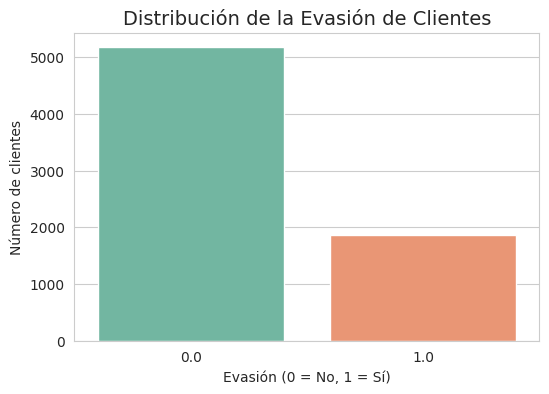

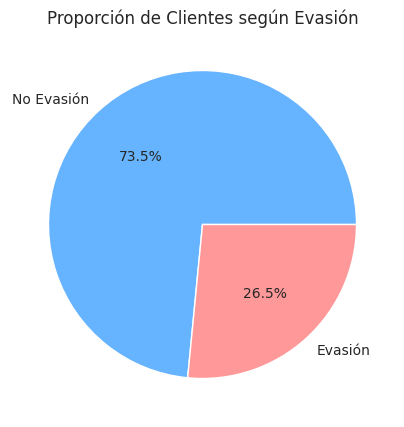

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de clientes que se evadieron vs. permanecieron
churn_counts = df_clean["Evasion"].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Distribución de la Evasión de Clientes", fontsize=14)
plt.xlabel("Evasión (0 = No, 1 = Sí)")
plt.ylabel("Número de clientes")
plt.show()

# Gráfico circular
plt.figure(figsize=(5,5))
plt.pie(churn_counts.values, labels=["No Evasión","Evasión"], autopct='%1.1f%%', colors=["#66b3ff","#ff9999"])
plt.title("Proporción de Clientes según Evasión")
plt.show()

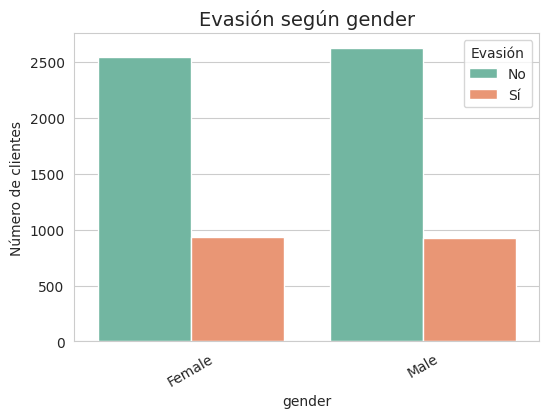

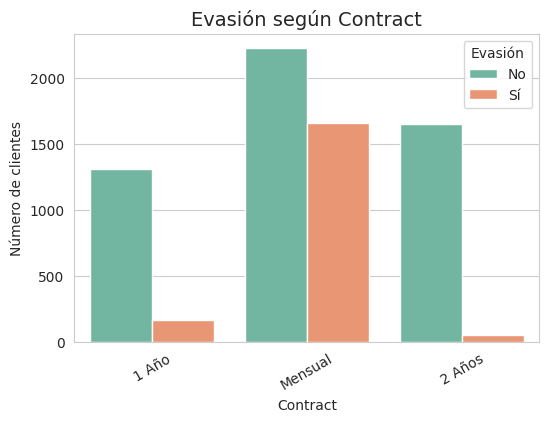

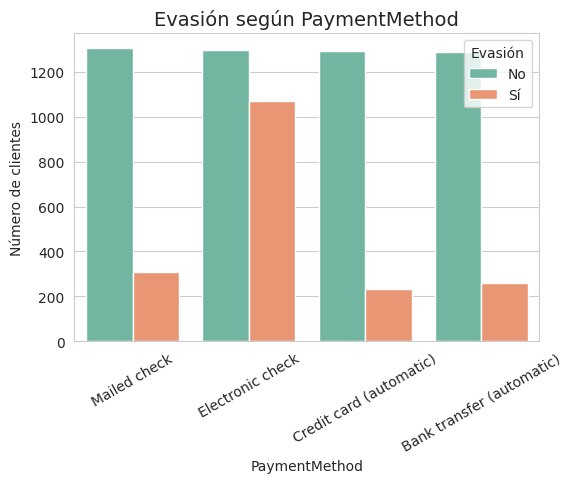

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ["gender", "Contract", "PaymentMethod"]

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, hue="Evasion", data=df_clean, palette="Set2")
    plt.title(f"Evasión según {var}", fontsize=14)
    plt.xlabel(var)
    plt.ylabel("Número de clientes")
    plt.xticks(rotation=30)
    plt.legend(title="Evasión", labels=["No", "Sí"])
    plt.show()

/tmp/ipython-input-2354192092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasion", y=var, data=df_clean, palette="Set2")


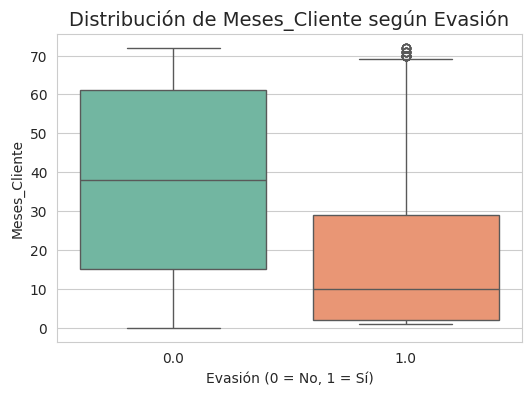

/tmp/ipython-input-2354192092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasion", y=var, data=df_clean, palette="Set2")


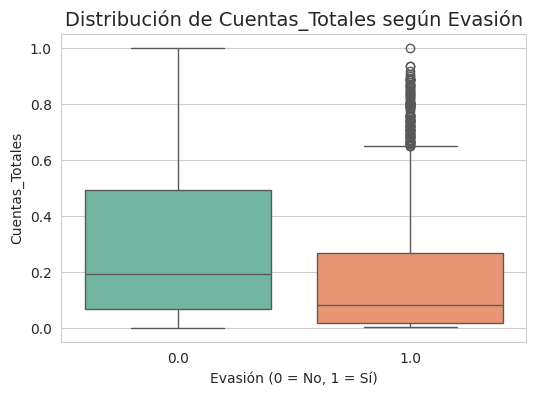

/tmp/ipython-input-2354192092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasion", y=var, data=df_clean, palette="Set2")


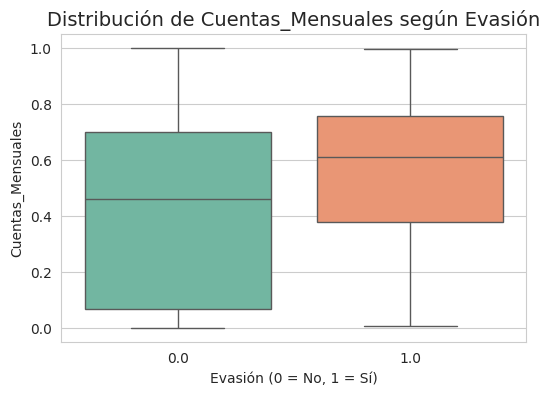

/tmp/ipython-input-2354192092.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Evasion", y=var, data=df_clean, palette="Set2")


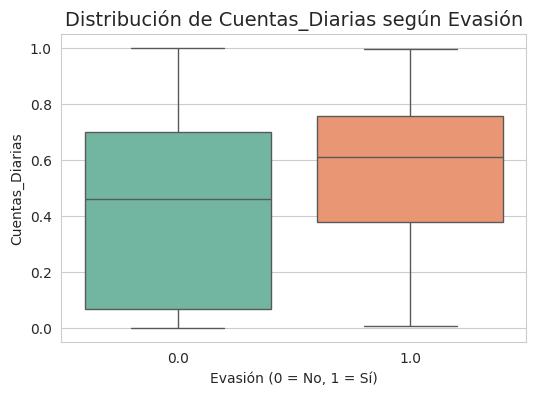

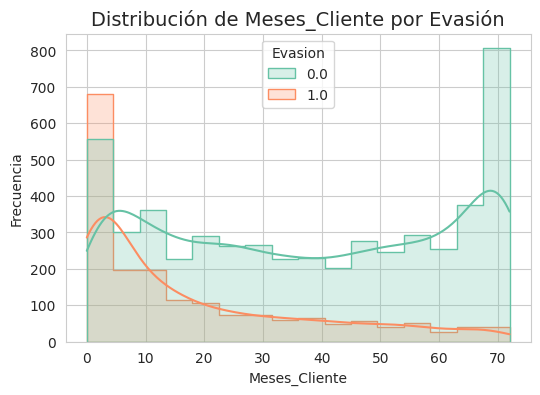

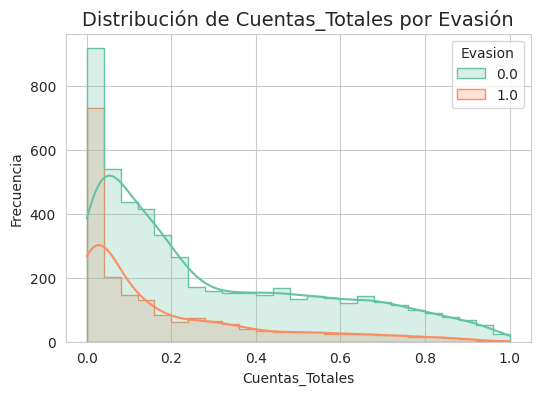

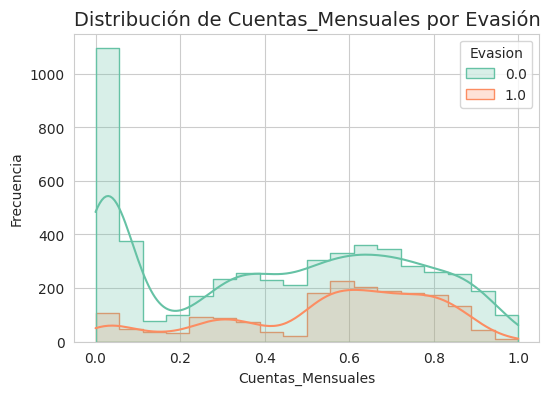

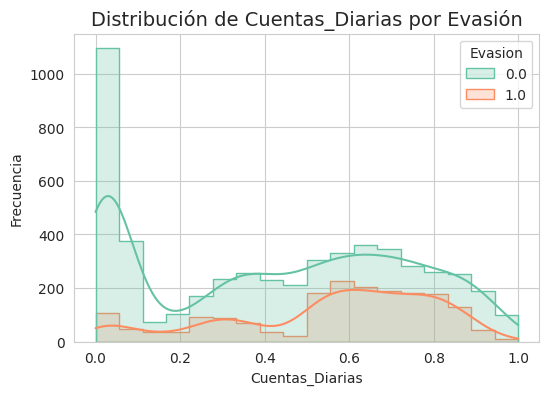

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_vars = ["Meses_Cliente", "Cuentas_Totales", "Cuentas_Mensuales", "Cuentas_Diarias"]

for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Evasion", y=var, data=df_clean, palette="Set2")
    plt.title(f"Distribución de {var} según Evasión", fontsize=14)
    plt.xlabel("Evasión (0 = No, 1 = Sí)")
    plt.ylabel(var)
    plt.show()

for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_clean, x=var, hue="Evasion", kde=True, palette="Set2", element="step")
    plt.title(f"Distribución de {var} por Evasión", fontsize=14)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

# 📊 Informe de Análisis de Evasión de Clientes (Churn)

## 1. Introducción
El objetivo de este análisis es comprender los factores que influyen en la **evasión de clientes** (churn) de nuestra empresa.
Identificar patrones en el comportamiento de los clientes permitirá diseñar estrategias para **reducir la pérdida de clientes**, optimizando la retención y aumentando la rentabilidad.

In [72]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set_style("whitegrid")

In [73]:
# Guardar el dataset limpio en CSV
df_clean.to_csv("TelecomX_Datos_Limpios.csv", index=False)
print("✅ Archivo exportado correctamente como TelecomX_Datos_Limpios.csv")

✅ Archivo exportado correctamente como TelecomX_Datos_Limpios.csv


In [74]:
import pandas as pd

# Cargar el dataset limpio desde el CSV
df_final = pd.read_csv("TelecomX_Datos_Limpios.csv")

# Validar
print("Dimensiones:", df_final.shape)
display(df_final.head())

Dimensiones: (7267, 22)


,customerID,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0.0,1.0,1.0,0.0,1 Año,1,Mailed check,0.471144,0.068315,0.471144
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0.0,0.0,0.0,1.0,Mensual,0,Mailed check,0.414428,0.062454,0.414428
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1.0,0.0,0.0,0.0,Mensual,1,Electronic check,0.553731,0.032338,0.553731
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1.0,0.0,1.0,1.0,Mensual,1,Electronic check,0.793532,0.142531,0.793532
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0.0,1.0,1.0,0.0,Mensual,1,Mailed check,0.653234,0.030789,0.653234


In [75]:
# Eliminar columnas irrelevantes
cols_to_drop = ["customerID", "Unnamed: 0"]  # agrega aquí las que identifiques como innecesarias
df_final = df_final.drop(columns=cols_to_drop, errors="ignore")

print("✅ Columnas eliminadas:", cols_to_drop)
print("Dimensiones después de la limpieza:", df_final.shape)

# Verificar primeras filas
df_final.head()

✅ Columnas eliminadas: ['customerID', 'Unnamed: 0']
Dimensiones después de la limpieza: (7267, 21)


,Evasion,gender,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cuentas_Mensuales,Cuentas_Totales,Cuentas_Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0.0,...,0.0,1.0,1.0,0.0,1 Año,1,Mailed check,0.471144,0.068315,0.471144
1,0.0,Male,0,0,0,9,1,1,DSL,0.0,...,0.0,0.0,0.0,1.0,Mensual,0,Mailed check,0.414428,0.062454,0.414428
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0.0,...,1.0,0.0,0.0,0.0,Mensual,1,Electronic check,0.553731,0.032338,0.553731
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,Mensual,1,Electronic check,0.793532,0.142531,0.793532
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0.0,...,0.0,1.0,1.0,0.0,Mensual,1,Mailed check,0.653234,0.030789,0.653234


In [76]:
import pandas as pd

# Identificar columnas categóricas
cat_cols = df_final.select_dtypes(include=["object", "category"]).columns
print("Columnas categóricas:", list(cat_cols))

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_final, columns=cat_cols, drop_first=True)

print("✅ Transformación completada")
print("Dimensiones originales:", df_final.shape)
print("Dimensiones codificadas:", df_encoded.shape)

# Vista previa del dataset codificado
df_encoded.head()

Columnas categóricas: ['gender', 'InternetService', 'Contract', 'PaymentMethod']
✅ Transformación completada
Dimensiones originales: (7267, 21)
Dimensiones codificadas: (7267, 25)


,Evasion,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Cuentas_Totales,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_2 Años,Contract_Mensual,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0,0.0,1.0,0.0,...,0.068315,0.471144,False,False,False,False,False,False,False,True
1,0.0,0,0,0,9,1,1,0.0,0.0,0.0,...,0.062454,0.414428,True,False,False,False,True,False,False,True
2,1.0,0,0,0,4,1,0,0.0,0.0,1.0,...,0.032338,0.553731,True,True,False,False,True,False,True,False
3,1.0,1,1,0,13,1,0,0.0,1.0,1.0,...,0.142531,0.793532,True,True,False,False,True,False,True,False
4,1.0,1,1,0,3,1,0,0.0,0.0,0.0,...,0.030789,0.653234,False,True,False,False,True,False,False,True


📊 Distribución de la variable Churn (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


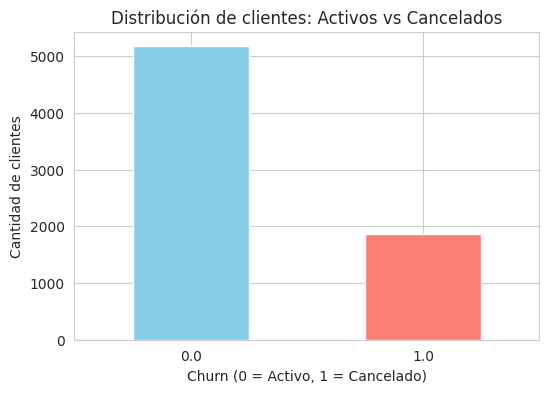

In [77]:
# Renombrar columna target
df_final = df_final.rename(columns={"Evasion": "Churn"})

# Calcular proporción de clientes que cancelaron vs los que permanecen
churn_counts = df_final["Churn"].value_counts(normalize=True) * 100

print("📊 Distribución de la variable Churn (%):")
print(churn_counts)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_final["Churn"].value_counts().plot(
    kind="bar", color=["skyblue","salmon"], rot=0
)
plt.title("Distribución de clientes: Activos vs Cancelados")
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cantidad de clientes")
plt.show()

📊 Distribución de la variable Churn (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


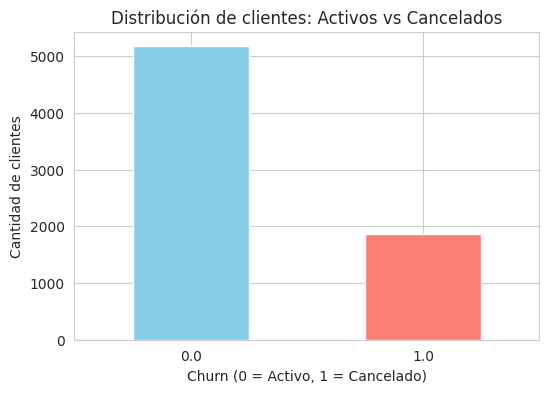

In [78]:
# Calcular proporción de clientes que cancelaron vs los que permanecen
churn_counts = df_final["Churn"].value_counts(normalize=True) * 100

print("📊 Distribución de la variable Churn (%):")
print(churn_counts)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_final["Churn"].value_counts().plot(
    kind="bar", color=["skyblue","salmon"], rot=0
)
plt.title("Distribución de clientes: Activos vs Cancelados")
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cantidad de clientes")
plt.show()

In [79]:
print(df_final["Churn"].value_counts())
print(df_final["Churn"].value_counts(normalize=True) * 100)

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [80]:
df_final["Churn"].isna().sum()

np.int64(224)

In [81]:
df_final = df_final.dropna(subset=["Churn"])

In [82]:
print(df_final["Churn"].value_counts())

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


In [86]:
X_encoded = X_encoded.dropna()
y_clean = y.loc[X_encoded.index]

In [91]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # o 'most_frequent' para categóricas
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded),
                         columns=X_encoded.columns,
                         index=X_encoded.index)  # <- conservamos los índices

# Ahora alineamos y sin errores
y_aligned = y.loc[X_imputed.index]

# Verificamos que no hay NaN
print(X_imputed.isna().sum())
print(y_aligned.isna().sum())

SeniorCitizen                            0
Partner                                  0
Dependents                               0
Meses_Cliente                            0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
Cuentas_Mensuales                        0
Cuentas_Totales                          0
Cuentas_Diarias                          0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_2 Años                          0
Contract_Mensual                         0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y_aligned)

print("Después del balanceo con SMOTE:\n", y_smote.value_counts())

Después del balanceo con SMOTE:
 Churn
0.0    3761
1.0    3761
Name: count, dtype: int64


In [94]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

print("Después del oversampling:", y_over.value_counts())

Después del oversampling: Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


In [96]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 1️⃣ Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True evita multicolinealidad

# 2️⃣ Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded),
                         columns=X_encoded.columns,
                         index=X_encoded.index)

# 3️⃣ Alinear la variable objetivo
y_aligned = y.loc[X_imputed.index]

# 4️⃣ Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y_aligned)

# 5️⃣ Ver resultados
print("Después de SMOTE:", y_smote.value_counts())

Después de SMOTE: Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separar X e y
y = df_final['Churn']
X = df_final.drop(columns=['Churn'])

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Imputar valores faltantes
imputer_num = SimpleImputer(strategy='mean')
X[num_cols] = imputer_num.fit_transform(X[num_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

# Codificación one-hot
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y)

# Verificar el resultado
print("Después de SMOTE:\n", y_smote.value_counts())

Después de SMOTE:
 Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Use the processed DataFrame df_final
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Identify categorical and numerical columns from df_final
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Pipeline for numerical columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Combinamos ambos pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Aplicamos el preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Aplicamos SMOTE para balancear la variable objetivo
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# Mostramos el balance de clases después de SMOTE
print("Balance de clases después de SMOTE:\n", y_balanced.value_counts())

Balance de clases después de SMOTE:
 Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


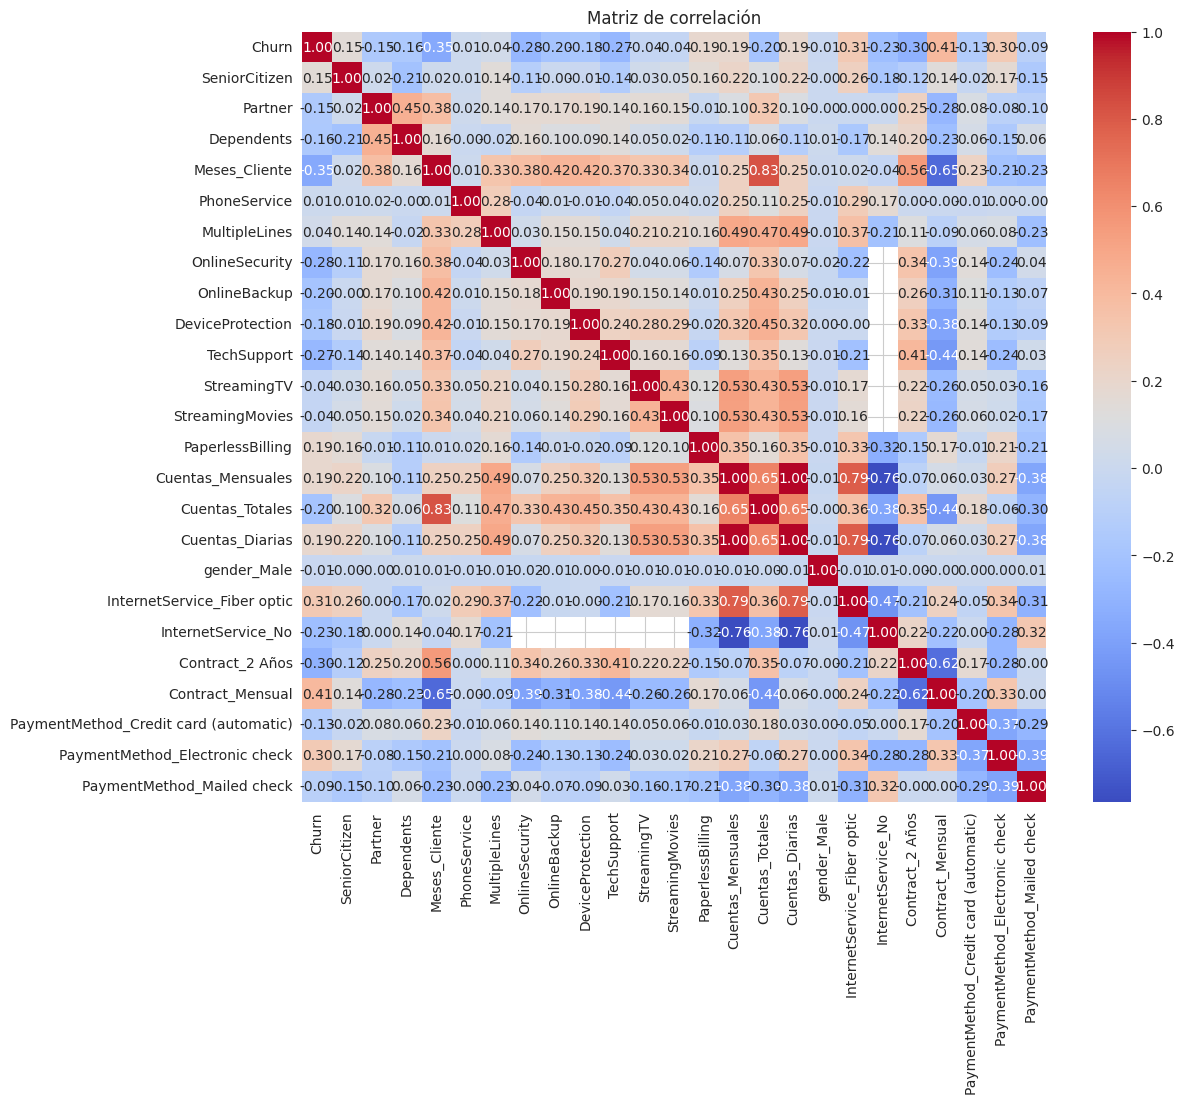

Correlación de las variables con Churn:
 Churn                                    1.000000
Contract_Mensual                         0.405103
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Cuentas_Diarias                          0.193356
Cuentas_Mensuales                        0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
MultipleLines                            0.040102
PhoneService                             0.011942
gender_Male                             -0.008612
StreamingTV                             -0.037057
StreamingMovies                         -0.040132
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
DeviceProtection                        -0.177125
OnlineBackup                            -0.196061
Cuentas_T

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the processed DataFrame df_final
# Drop the 'customerID' column as it's not numerical and irrelevant for correlation
df_corr = df_final.drop(columns=['customerID'], errors='ignore').copy()

# Identify categorical columns for one-hot encoding
categorical_cols = df_corr.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df_corr_encoded = pd.get_dummies(df_corr, columns=categorical_cols, drop_first=True)


# Calculate the correlation matrix
corr_matrix = df_corr_encoded.corr()

# Visualizamos con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación")
plt.show()

# Opcional: Ver las variables más correlacionadas con Churn
corr_target = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación de las variables con Churn:\n", corr_target)

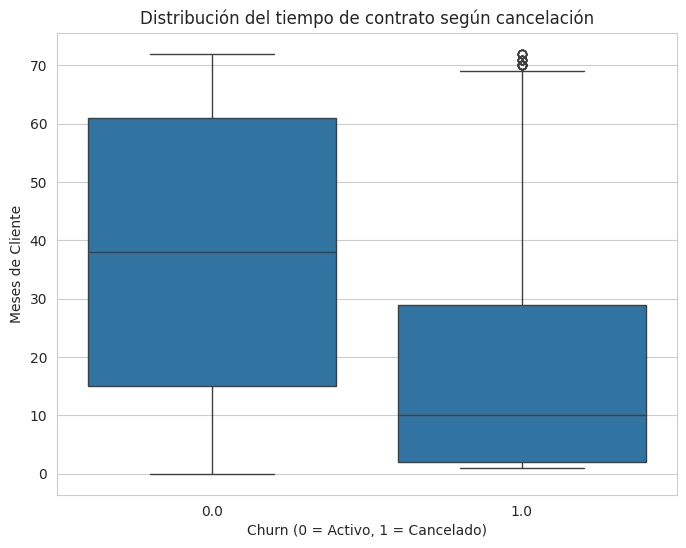

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Meses_Cliente vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Meses_Cliente', data=df_final)
plt.title('Distribución del tiempo de contrato según cancelación')
plt.xlabel('Churn (0 = Activo, 1 = Cancelado)')
plt.ylabel('Meses de Cliente')
plt.show()

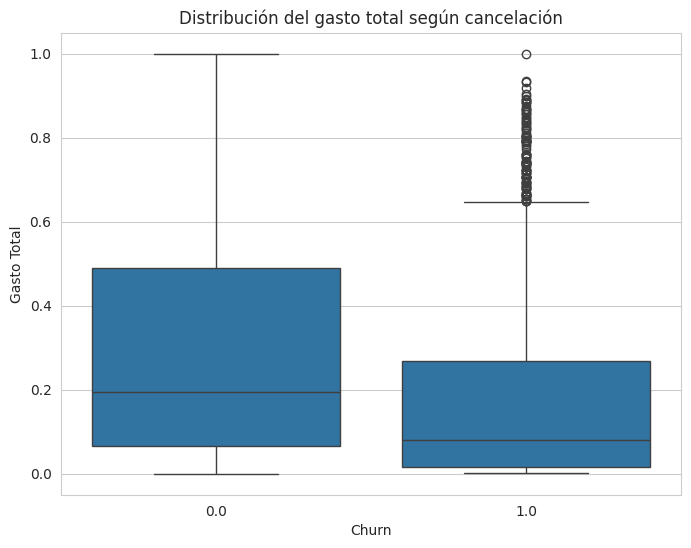

In [109]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Cuentas_Totales', data=df_final)
plt.title('Distribución del gasto total según cancelación')
plt.xlabel('Churn')
plt.ylabel('Gasto Total')
plt.show()

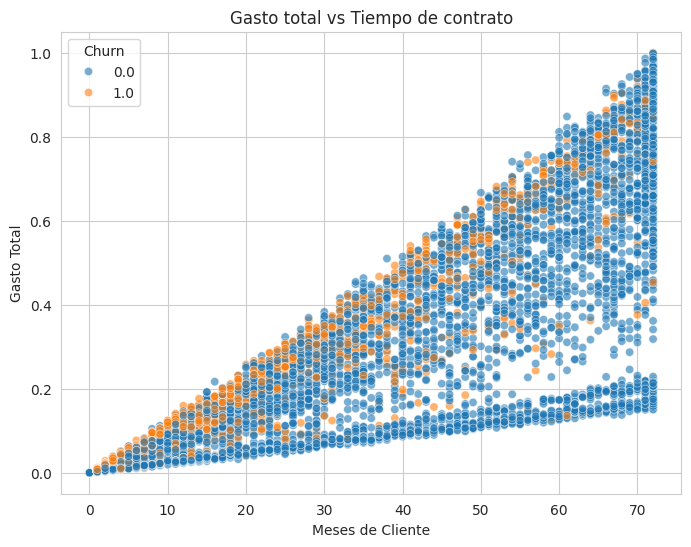

In [111]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Meses_Cliente', y='Cuentas_Totales', hue='Churn', data=df_final, alpha=0.6)
plt.title('Gasto total vs Tiempo de contrato')
plt.xlabel('Meses de Cliente')
plt.ylabel('Gasto Total')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split

# X: variables independientes, y: variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# División 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (5086, 7)
Tamaño de prueba: (2181, 7)


In [113]:
from sklearn.model_selection import train_test_split

# Variables independientes y objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# División 70/30 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Separar variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

# Pipeline numérico
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # solo necesario para modelos sensibles a escala
])

# Pipeline categórico
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Combinar ambos pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd # Import pandas

# Use the processed DataFrame df_final
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Identify automatically numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns


# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # only necessary for models sensitive to scale
])

# Pipeline for categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Model 1: Logistic Regression (requires normalization) ---
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, y_pred_logreg))

# --- Modelo 2: Random Forest (no requires normalization) ---
# For Random Forest, remove scaling from num_pipeline
num_pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor_rf = ColumnTransformer([
    ('num', num_pipeline_rf, num_features),
    ('cat', cat_pipeline, cat_features)
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

=== Regresión Logística ===
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1552
         1.0       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1552
         1.0       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"=== {model_name} ===")
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred, pos_label=1.0))
    print("Recall:", recall_score(y_test, y_pred, pos_label=1.0))
    print("F1-score:", f1_score(y_test, y_pred, pos_label=1.0))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluar Regresión Logística
evaluate_model(logreg_pipeline, X_test, y_test, "Regresión Logística")

# Evaluar Random Forest
evaluate_model(rf_pipeline, X_test, y_test, "Random Forest")

=== Regresión Logística ===
Exactitud (Accuracy): 0.7979176526265973
Precisión: 0.6395833333333333
Recall: 0.5472370766488414
F1-score: 0.5898174831892411
Matriz de confusión:
 [[1379  173]
 [ 254  307]]


=== Random Forest ===
Exactitud (Accuracy): 0.7851396119261713
Precisión: 0.6207674943566591
Recall: 0.49019607843137253
F1-score: 0.547808764940239
Matriz de confusión:
 [[1384  168]
 [ 286  275]]




In [ ]:
Regresión Logística

Métricas principales:

Accuracy: 0.798 → el modelo acierta aproximadamente el 80% del tiempo.

Precision (Churn=1): 0.64 → cuando predice que un cliente va a cancelar, lo hace correctamente el 64% de las veces.

Recall (Churn=1): 0.55 → de todos los clientes que realmente cancelan, el modelo detecta solo el 55%.

F1-score (Churn=1): 0.59 → un balance entre precisión y recall.

Matriz de confusión:

[[1379 173]  <- clientes que no cancelan (0)
 [ 254 307]] <- clientes que sí cancelan (1)


Interpretación:

El modelo tiende a predecir más correctamente a los clientes que no cancelan (clase mayoritaria).

Se pierden 254 clientes que sí cancelan (falsos negativos), lo cual es importante en churn prediction, porque esos son clientes que deberíamos retener.


Random Forest

Métricas principales:

Accuracy: 0.785 → un poco menor que la regresión logística, pero aún cercano al 79%.

Precision (Churn=1): 0.62 → ligeramente menor que la regresión logística.

Recall (Churn=1): 0.49 → detecta menos clientes que cancelan, peor que la regresión logística.

F1-score (Churn=1): 0.55 → también menor.

Matriz de confusión:

[[1384 168]  <- clientes que no cancelan (0)
 [ 286 275]] <- clientes que sí cancelan (1)


Interpretación:

Random Forest es un poco más conservador en predecir churn.

Detecta menos clientes que realmente cancelan, lo que puede ser un problema si el objetivo es retener clientes.

In [ ]:
A manera tal que en cuanto a accuracy ambas tienen buen desempeño general,
y en valores muy similares en cuanto a la precision el LR identifica mejor
los clientes que cancelan cuando predicen positivo. En cuanto al recall el
LR captura más clientes que realmente cancelan; RF pierde más (falsos
negativos) y por ultimo el F-1 el LR tiene mejor equilibrio entre precision
y recall.

In [ ]:
Regresión logística funciona mejor que Random Forest para detectar clientes que cancelan (clase minoritaria).

Ambos modelos están sesgados hacia la clase mayoritaria (clientes que no cancelan).

Hay espacio para mejorar el recall en la predicción de churn, por ejemplo:

Usar SMOTE dentro del pipeline en el conjunto de entrenamiento.

Ajustar los thresholds de predicción para priorizar detección de churn.

Probar otros algoritmos como XGBoost o LightGBM, que suelen manejar mejor desequilibrio.